Para correr el modelo es necesario importar la clase custom que envuelve a este.

In [6]:
from customModel import CustomModel
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import joblib
votingModel = joblib.load('votingModel.joblib')

In [7]:
# Importamos los tweets de los candidatos y los concatenamos
presis = ['artes_oficial', 'gabrielboric', 'joseantoniokast', 'marcoporchile', 'Parisi_oficial', 'ProvosteYasna', 'sebastiansichel']
testDf = pd.DataFrame(columns=['username','author_id','tweet_id','texto','text'])
repliesDf = pd.DataFrame(columns=['username','author_id','tweet_id','texto','text'])
# iteramos sobre los candidatos
for p in presis:
    # leemos el archivo
    dfCandidato = pd.read_csv('presis/'+p+'.csv')
    dfRepliesCandidato = pd.read_csv('presis/'+p+'_replies.csv')
    # concatenamos
    testDf = testDf.append(dfCandidato, ignore_index=True)
    repliesDf = repliesDf.append(dfRepliesCandidato, ignore_index=True)

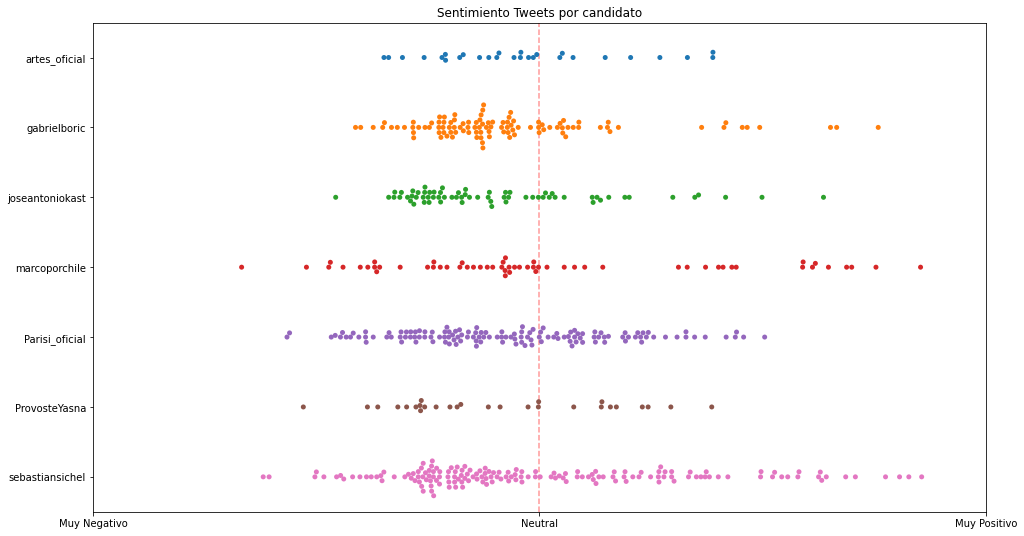

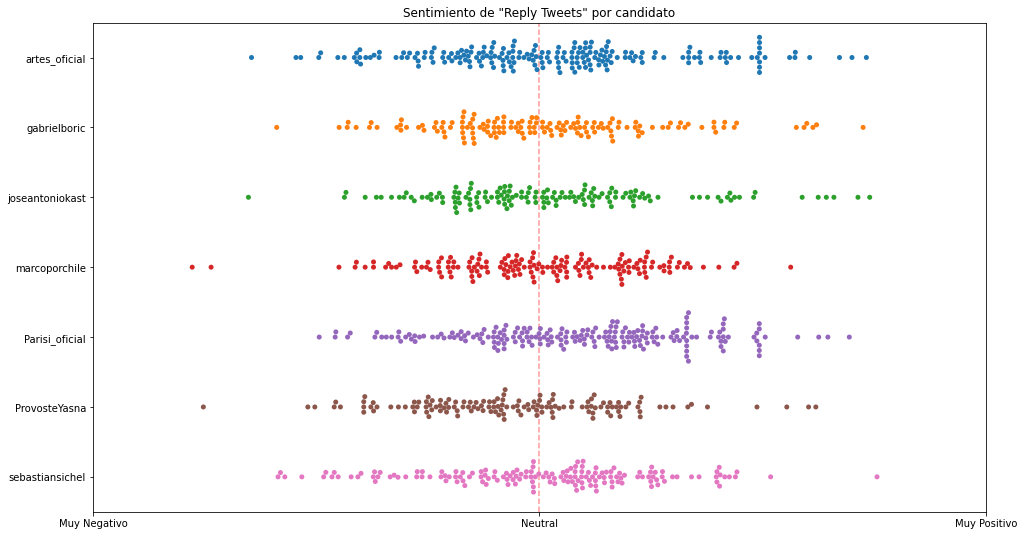

In [8]:
def scatterTweets(df, title):
    df['voting_predict_proba'] = votingModel.predict_proba(df['text'])[:, 1]

    plt.figure(figsize=(16,9))
    sns.swarmplot(x='voting_predict_proba', y='username', data=df, marker='o')
    plt.axvline(x=0.5, color='r', linestyle='--', alpha=.4)
    plt.title(title)
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks([0,.5, 1.0], ['Muy Negativo', 'Neutral' ,'Muy Positivo']);
scatterTweets(testDf, 'Sentimiento Tweets por candidato')
scatterTweets(repliesDf, 'Sentimiento de "Reply Tweets" por candidato')